In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import seaborn as sns
import plotly.express as px
from scipy.stats import skew

pd.set_option('display.max_columns', 30)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
abundance = pd.read_csv('/content/drive/MyDrive/ICA-HW2/csv/abundance.csv', low_memory=False)


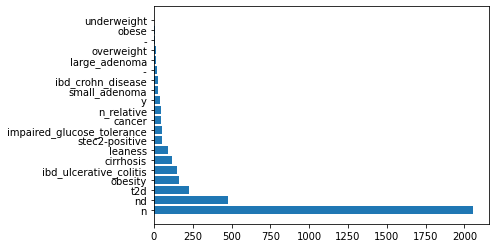

In [4]:
disease = abundance.loc[:,'disease'] 
d_name = abundance.loc[:,'dataset_name'] 
disease_plot = disease.value_counts()
name_plot = d_name.value_counts()
plt.barh(disease_plot.index, disease_plot.values)
plt.show()

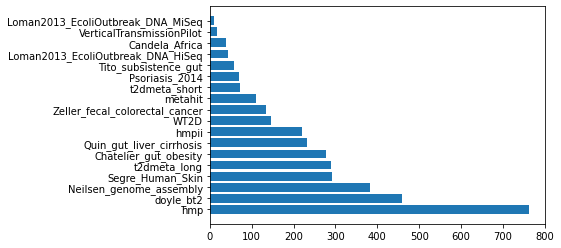

In [5]:
plt.barh(name_plot.index, name_plot.values)
plt.show()

In [6]:
ls =  abundance.columns.tolist()

In [7]:
organism = [ x for x in ls if x.startswith('k_')]
metadata = [ x for x in ls if not x.startswith('k_')]

In [8]:
organism_data = abundance[organism]

In [9]:
disease_data = abundance[metadata]

In [10]:
disease_data

,dataset_name,sampleID,subjectID,bodysite,disease,age,gender,country,sequencing_technology,pubmedid,camp,paired_end_insert_size,read_length,total_reads,matched_reads,...,hscrp,c-peptide,tnfa,il-1,cd163,statins,insulin,oral_anti-diabetic_medication,years_in_sweden,tnm_stage,ajcc_stage,localization,fobt,wif-1_gene_methylation_test,group
0,Candela_Africa,H10,h10,stool,n,40,female,tanzania,Illumina,25981789,dedauko,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd
1,Candela_Africa,H11,h11,stool,n,29,female,tanzania,Illumina,25981789,dedauko,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd
2,Candela_Africa,H12,h12,stool,n,8,female,tanzania,Illumina,25981789,dedauko,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd
3,Candela_Africa,H13,h13,stool,n,34,male,tanzania,Illumina,25981789,dedauko,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd
4,Candela_Africa,H14,h14,stool,n,30,male,tanzania,Illumina,25981789,dedauko,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,Zeller_fecal_colorectal_cancer,CCIS95409808ST-4-0,fr-152,stool,n,63,female,france,Illumina,25432777,nd,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,na,na,na,negative,negative,control
3606,Zeller_fecal_colorectal_cancer,CCIS96387239ST-4-0,fr-626,stool,small_adenoma,66,male,france,Illumina,25432777,nd,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,na,na,lc,negative,negative,control
3607,Zeller_fecal_colorectal_cancer,CCIS98482370ST-3-0,fr-052,stool,n,53,female,france,Illumina,25432777,nd,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,na,na,na,negative,negative,control
3608,Zeller_fecal_colorectal_cancer,CCIS98512455ST-4-0,fr-459,stool,cancer,63,male,france,Illumina,25432777,nd,nd,nd,nd,nd,...,nd,nd,nd,nd,nd,nd,nd,nd,nd,t4n1m1,iv,rc,negative,negative,crc


In [11]:
disease.drop(columns=['dataset_name'], inplace = True)

In [12]:
organism_data

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae|t__GCF_000012545,k__Bacteria,k__Bacteria|p__Acidobacteria,k__Bacteria|p__Acidobacteria|c__Acidobacteriia,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus|t__GCF_000286335,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri|t__GCF_000421665,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
0,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.24169,0.00000,0.00000,0.00000,0.00000,99.75831,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.50621,0.00000,0.00000,0.00000,0.00000,99.49379,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.30522,0.00000,0.00000,0.00000,0.00000,99.69478,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.40133,0.40133,0.40133,0.40133,0.40133,0.35994,0.35994,0.35994,0.00000,0.04139,0.04139,0.04139,99.59867,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.17479,0.17479,0.17479,0.17479,0.17479,0.16331,0.15280,0.15280,0.01051,0.01148,0.01148,0.01148,99.82

In [13]:
organism_data.describe()

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii|t__Methanobrevibacter_smithii_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae|t__GCF_000012545,k__Bacteria,k__Bacteria|p__Acidobacteria,k__Bacteria|p__Acidobacteria|c__Acidobacteriia,...,k__Bacteria|p__Firmicutes|c__Bacilli|o__Bacillales|f__Staphylococcaceae|g__Staphylococcus|s__Staphylococcus_vitulinus|t__GCF_000286335,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Bavariicoccus|s__Bavariicoccus_seileri|t__GCF_000421665,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Enterococcaceae|g__Enterococcus|s__Enterococcus_gilvus|t__Enterococcus_gilvus_unclassified,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis,k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactobacillales|f__Lactobacillaceae|g__Lactobacillus|s__Lactobacillus_otakiensis|t__GCF_000415925,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Peptococcaceae|g__Desulfotomaculum|s__Desulfotomaculum_ruminis|t__GCF_000215085,k__Bacteria|p__Firmicutes|c__Clostridia|o__Clostridiales|f__Ruminococcaceae|g__Faecalibacterium|s__Faecalibacterium_prausnitzii|t__GCF_000209855,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1,k__Bacteria|p__Firmicutes|c__Negativicutes|o__Selenomonadales|f__Veillonellaceae|g__Megasphaera|s__Megasphaera_sp_BV3C16_1|t__GCF_000478965
count,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,...,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000,3610.000000
mean,0.390213,0.390213,0.390008,0.390008,0.390008,0.381022,0.368204,0.368204,0.012818,0.008840,0.008840,0.008840,99.402186,0.001059,0.000845,...,0.000001,0.000003,0.000003,0.000003,0.000025,0.000025,0.000014,0.000014,0.000022,0.000022,0.000022,0.000022,0.000259,0.000256,0.000256
std,2.177087,2.177087,2.176751,2.176751,2.176751,2.150313,2.125308,2.125308,0.109553,0.098988,0.098988,0.098988,3.463245,0.015208,0.008185,...,0.000062,0.000198,0.000198

In [14]:
organism_data = organism_data.iloc[:,:10]

In [15]:
concat_data = pd.concat([organism_data, disease_data], axis=1)
df_plot = concat_data[['country', 'bodysite', 'age', 'k__Archaea', 'disease']].copy()
df_plot

,country,bodysite,age,k__Archaea,disease
0,tanzania,stool,40,0.24169,n
1,tanzania,stool,29,0.50621,n
2,tanzania,stool,8,0.30522,n
3,tanzania,stool,34,0.40133,n
4,tanzania,stool,30,0.17479,n
...,...,...,...,...,...
3605,france,stool,63,6.59835,n
3606,france,stool,66,0.00000,small_adenoma
3607,france,stool,53,0.00000,n
3608,france,stool,63,0.17495,cancer


In [16]:
import seaborn as sns;sns.set_theme()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer

In [17]:
x = organism_data.values
x = StandardScaler().fit_transform(x)

In [18]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)



In [19]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(principalComponents, x=0, y=1)

fig.show()

In [20]:
pca.fit(principalDf)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Duas Componentes", "y": "Variância"}
)

In [21]:
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00,  7.99360578e-15,
         6.80607914e-17, -2.38524478e-18,  7.41153829e-22,
         1.00974196e-27,  2.15704154e-31,  8.42594351e-35,
        -1.50463277e-34],
       [-0.00000000e+00, -7.99360578e-15,  1.00000000e+00,
         4.47639972e-17, -2.60208521e-18,  1.69406589e-21,
         1.76704843e-28, -1.36047691e-30, -6.68779173e-32,
        -4.99538079e-34],
       [-0.00000000e+00, -6.87384177e-17, -4.60379347e-17,
         1.00000000e+00,  2.38953818e-16, -3.03823452e-19,
         1.74889652e-25, -1.00014557e-29, -1.66453349e-31,
        -2.30627170e-30],
       [-0.00000000e+00, -0.00000000e+00,  8.67361738e-19,
         2.86003322e-18,  1.00000000e+00, -5.80015479e-17,
         9.95670899e-26, -4.36167145e-29,  8.68642236e-31,
         2.

In [22]:
from sklearn import preprocessing


In [23]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
features = ['k__Archaea',	'k__Archaea|p__Euryarchaeota']
fig = px.scatter(principalComponents, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [24]:
organism_data = organism_data.iloc[:, :3]

In [25]:
organism_data

,k__Archaea,k__Archaea|p__Euryarchaeota,k__Archaea|p__Euryarchaeota|c__Methanobacteria
0,0.24169,0.24169,0.24169
1,0.50621,0.50621,0.50621
2,0.30522,0.30522,0.30522
3,0.40133,0.40133,0.40133
4,0.17479,0.17479,0.17479
...,...,...,...
3605,6.59835,6.59835,6.59835
3606,0.00000,0.00000,0.00000
3607,0.00000,0.00000,0.00000
3608,0.17495,0.17495,0.17495


In [26]:
disease_data = pd.concat([disease_data, organism_data], axis=1)

In [27]:
diseases = ['obesity', 'cirrhosis', 't2d', 'cancer']

In [28]:
data_sets = {'healthy':['hmp', 'hmpii'],'t2d':['WT2D','t2dmeta_long','t2dmeta_short'], 'cirrhosis' : ['Quin_gut_liver_cirrhosis'], 
             'cancer' : ['Zeller_fecal_colorectal_cancer'], 'obesity' : ['Chatelier_gut_obesity']}

In [29]:
disease_data['disease'] = disease_data['disease'].apply(lambda x: 'healthy' if ((x=='n') or (x=='n_relative') or (x =='nd') or (x=='leaness') or (x=='-') or (x==' -')) else x)

In [30]:
i = disease_data[(disease_data['disease'] == 'y') | (disease_data['disease'] == 'underweight')].index
disease_data.drop(i, inplace=True)

In [31]:
healthy_data = [x for x in disease_data.columns.unique().tolist() if x not in disease ]

In [32]:
disease_data.drop(['sampleID', 'subjectID', 'gender', 'pubmedid', 'sequencing_technology'], axis=1, inplace= True)

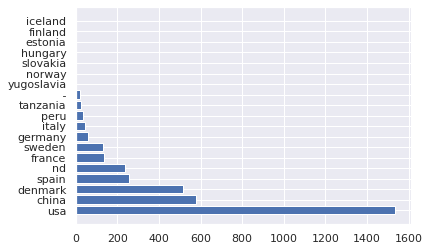

In [33]:
disease_plot = disease_data['country'].value_counts()
plt.barh(disease_plot.index, disease_plot.values)
plt.show()

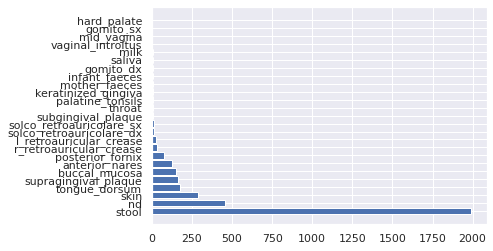

In [34]:
disease_plot = disease_data['bodysite'].value_counts()
plt.barh(disease_plot.index, disease_plot.values)
plt.show()

In [35]:
disease_data = disease_data.replace('nd',0).replace('na',0).replace('-',0).replace(' -',0)

In [36]:
disease_data['age'] = disease_data[["age"]].apply(pd.to_numeric)

In [37]:
disease_data['age'] = disease_data['age'].replace(0, disease_data['age'].mean())

In [38]:
disease_data['age'] = disease_data['age'].fillna(disease_data['age'].mean())

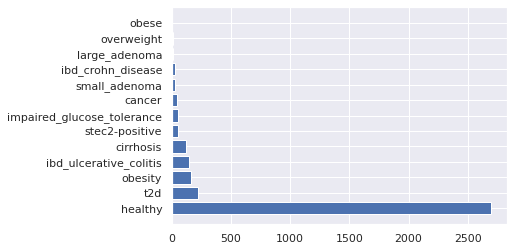

In [39]:
disease_plot = disease_data['disease'].value_counts()
name_plot = d_name.value_counts()
plt.barh(disease_plot.index, disease_plot.values)
plt.show()

In [40]:
disease_data_float = disease_data.select_dtypes(include='float64')
disease_data_cat = disease_data.select_dtypes(include='object')

In [41]:
for cols in disease_data_cat.columns:
    if cols != 'disease':
      disease_data_cat[cols] = disease_data_cat[cols].astype('category').cat.codes
    else:
      disease_data_cat[cols] = disease_data_cat[cols].astype('category')
      d = dict(enumerate(disease_data_cat['disease'].cat.categories))
disease_data_cat['disease'] = disease_data_cat['disease'].cat.codes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

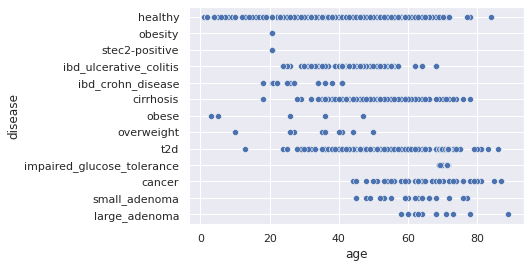

In [42]:
sns.scatterplot(data = disease_data, x='age', y='disease')

In [43]:
concat_data = pd.concat([disease_data_cat, disease_data_float], axis=1)
df_plot = concat_data[['country', 'bodysite', 'age', 'k__Archaea']].copy()
df_plot

,country,bodysite,age,k__Archaea
0,15,19,40.0,0.24169
1,15,19,29.0,0.50621
2,15,19,8.0,0.30522
3,15,19,34.0,0.40133
4,15,19,30.0,0.17479
...,...,...,...,...
3605,5,19,63.0,6.59835
3606,5,19,66.0,0.00000
3607,5,19,53.0,0.00000
3608,5,19,63.0,0.17495


MONO-VARIATE

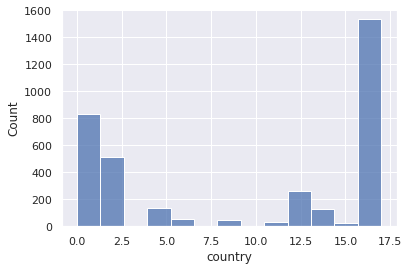

In [44]:
sns.histplot(data=df_plot.country)

In [45]:
df_plot.country.describe()#a primeira e a segunda coluna do dataset

count    3573.000000
mean        9.402743
std         6.870451
min         0.000000
25%         2.000000
50%        13.000000
75%        16.000000
max        17.000000
Name: country, dtype: float64

In [46]:
skew(df_plot.country)

-0.2640554919711294

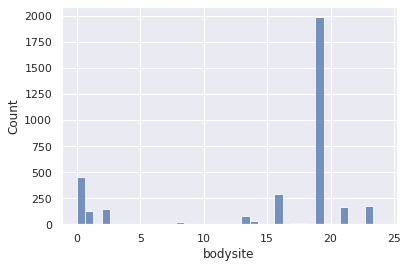

In [47]:
sns.histplot(data=df_plot.bodysite)

In [48]:
df_plot.bodysite.describe()

count    3573.000000
mean       14.884971
std         7.604143
min         0.000000
25%        14.000000
50%        19.000000
75%        19.000000
max        24.000000
Name: bodysite, dtype: float64

In [49]:
skew(df_plot.bodysite)

-1.2207568670198583

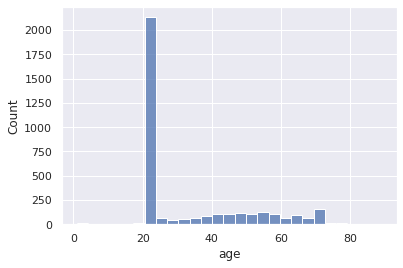

In [50]:
sns.histplot(data=df_plot.age)

In [51]:
df_plot.age.describe()

count    3573.000000
mean       32.713420
std        17.643919
min         1.000000
25%        20.600115
50%        20.600115
75%        46.000000
max        89.000000
Name: age, dtype: float64

In [52]:
skew(df_plot.age)

1.050374044387792

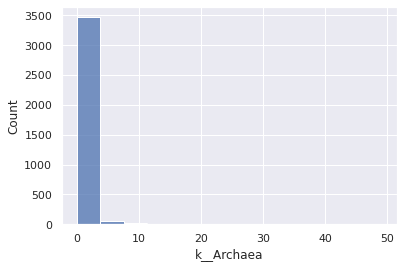

In [53]:
sns.histplot(data=df_plot.k__Archaea)

In [54]:
df_plot.k__Archaea.describe()

count    3573.000000
mean        0.385228
std         2.122048
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        49.058170
Name: k__Archaea, dtype: float64

In [55]:
skew(df_plot.k__Archaea)

11.958442104232176

BI-VARIATE 

Text(0, 0.5, 'Age')

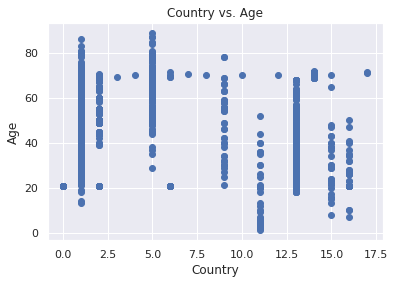

In [56]:
plt.scatter(df_plot.country, df_plot.age)
plt.title('Country vs. Age')
plt.xlabel('Country')
plt.ylabel('Age')

Text(0, 0.5, 'Bodysite')

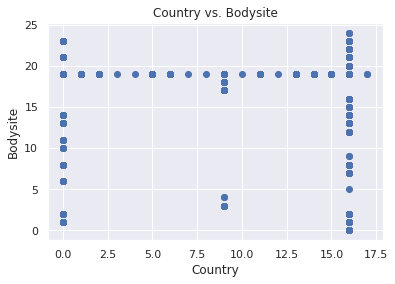

In [57]:
plt.scatter(df_plot.country, df_plot.bodysite)
plt.title('Country vs. Bodysite')
plt.xlabel('Country')
plt.ylabel('Bodysite')

Text(0, 0.5, 'Age')

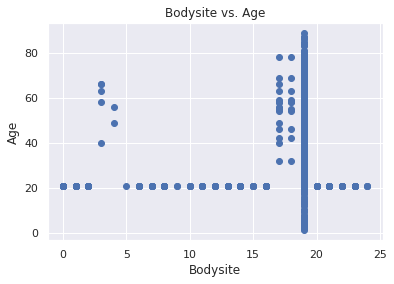

In [58]:
plt.scatter(df_plot.bodysite, df_plot.age)
plt.title('Bodysite vs. Age')
plt.xlabel('Bodysite')
plt.ylabel('Age')

In [59]:
doenca = disease_data_cat.disease

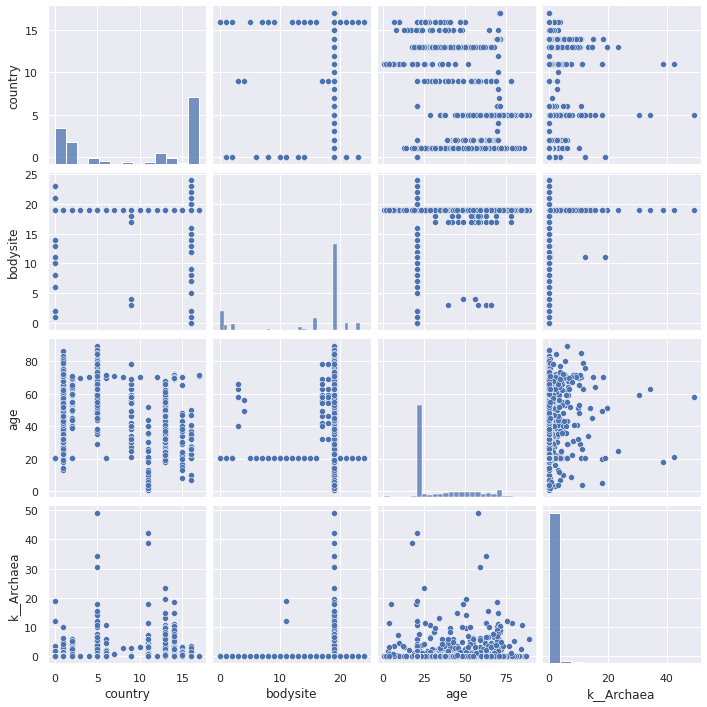

In [60]:
sns.pairplot(data=df_plot)

Aplicação do Log Para resolver Skewness

In [61]:
disease_data_cat = np.log(disease_data_cat + 1)

In [62]:
#g = sns.PairGrid(data=plotdata)
#g.map_diag(sns.histplot)
#g.map_offdiag(sns.scatterplot)

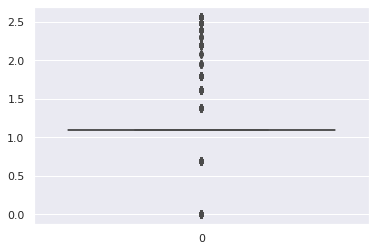

In [63]:
sns.boxplot(data=disease_data_cat.disease)

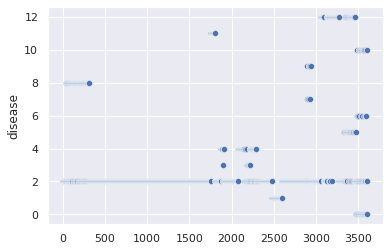

In [64]:
sns.scatterplot(data=doenca)

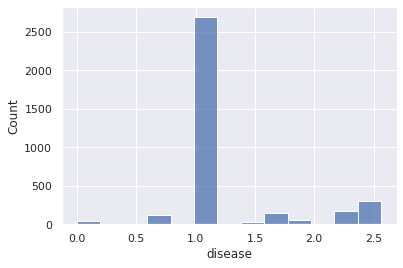

In [65]:
sns.histplot(data=disease_data_cat.disease)

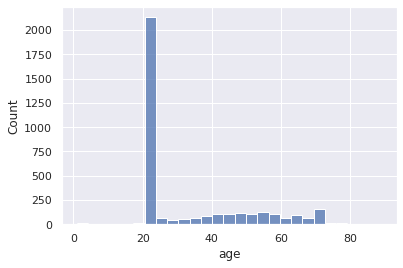

In [66]:
sns.histplot(data=disease_data_float.age)

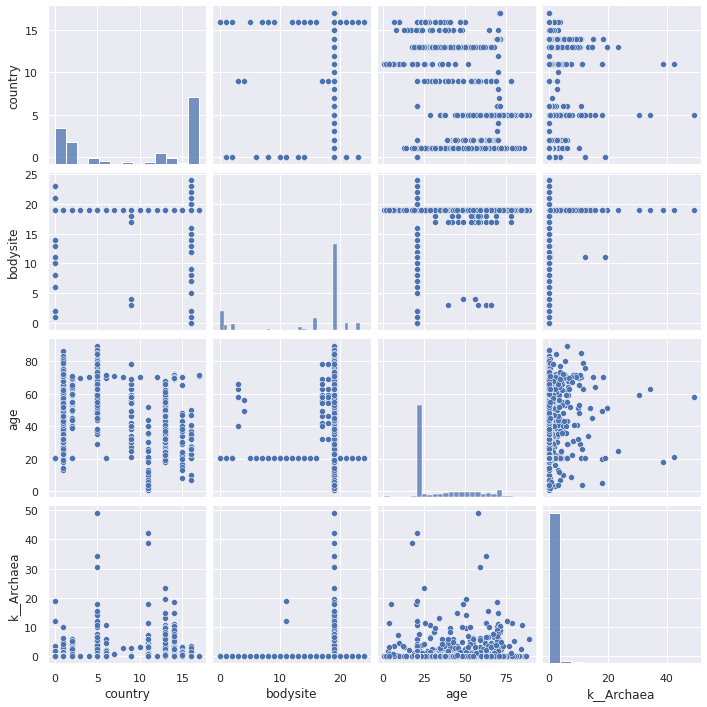

In [67]:
sns.pairplot(data=df_plot)

Aplicação do Log Para resolver Skewness (Float)




In [68]:
disease_data_float = np.log(disease_data_float + 1)

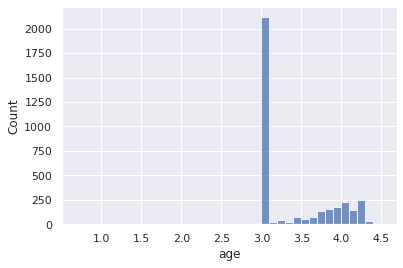

In [69]:
sns.histplot(data=disease_data_float.age)

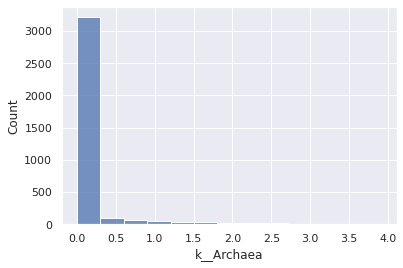

In [70]:
sns.histplot(data=disease_data_float.k__Archaea)

In [71]:
disease_data_float.k__Archaea.describe()

count    3573.000000
mean        0.130490
std         0.431099
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.913186
Name: k__Archaea, dtype: float64

In [72]:
skew(disease_data_float.k__Archaea)

4.301170160694184

In [73]:
disease_data_cat.disease = doenca

In [74]:
teste = pd.concat([disease_data_cat, disease_data_float],axis=1)

In [75]:
teste.drop(['dataset_name'], axis = 1, inplace = True)

In [76]:
target = teste['disease']

# PCA com as doenças

In [77]:
#x = teste.copy()
#i = x[(x['disease'] != 0) | (x['disease'] != 1) | (x['disease'] != 2) | (x['disease'] != 9) | (x['disease'] != 13)].index
#x.loc[i,'disease'] = -1

In [78]:
ls = [0, 1, 2, 9, 13]

In [79]:
x = teste.values
x = StandardScaler().fit_transform(x)

In [80]:
pca = PCA(n_components=2)
pca.fit(x)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

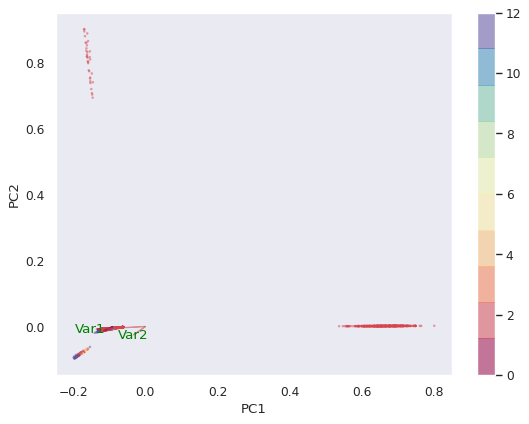

In [81]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi = 80)
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = 2
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5, c=target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.colorbar();
    plt.grid()


myplot(principalComponents[:,0:2],np.transpose(pca.components_[0:2, :]))

plt.show()


In [82]:
pca.components_

array([[-0.13260001, -0.0298228 ,  0.0525345 , -0.00453795, -0.01843757,
        -0.01852219, -0.01829846, -0.018315  , -0.01831224, -0.01830062,
        -0.0182826 , -0.01826245, -0.01825722, -0.05872831, -0.01815998,
        -0.01819185,  0.00464801,  0.1141255 ,  0.14823469,  0.14672004,
         0.14488535,  0.13612151,  0.13789365,  0.13128949,  0.14605482,
         0.14977034,  0.14976826,  0.14897254,  0.14711841,  0.15184023,
         0.0591977 ,  0.05571428,  0.05470836,  0.02149295,  0.02109847,
         0.15003008,  0.14535895,  0.14780855,  0.15157063,  0.14307317,
         0.15056194,  0.14897197,  0.06786157,  0.14972994,  0.14767642,
         0.14932993,  0.14847278,  0.14550997,  0.13601589,  0.14858797,
         0.14964135,  0.13250019,  0.14890806,  0.13750934,  0.14228993,
         0.14842351,  0.14045293,  0.05211298,  0.0521155 ,  0.05267517,
         0.14488838,  0.14044571,  0.14860444,  0.14792765,  0.1478479 ,
         0.1497444 ,  0.14954127,  0.14743798,  0.0

In [83]:
pca.explained_variance_

array([42.77987468, 23.58523837])

In [84]:
fig = px.scatter(principalComponents, x=0, y=1, color=target)
fig.show()

In [85]:
#target = [ t if ((t == 0) or (t == 1) or (t == 2) or (t == 9) or (t == 13)) else -1 for t in target]

In [86]:
d

{0: 'cancer',
 1: 'cirrhosis',
 2: 'healthy',
 3: 'ibd_crohn_disease',
 4: 'ibd_ulcerative_colitis',
 5: 'impaired_glucose_tolerance',
 6: 'large_adenoma',
 7: 'obese',
 8: 'obesity',
 9: 'overweight',
 10: 'small_adenoma',
 11: 'stec2-positive',
 12: 't2d'}

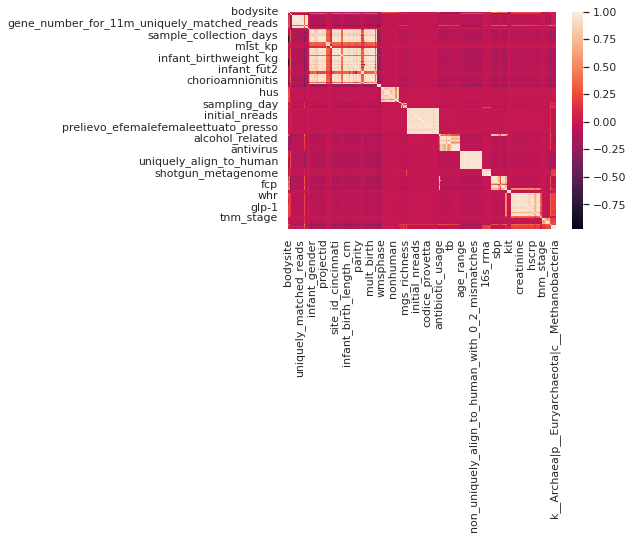

In [87]:
correlacao = teste.corr()
sns.heatmap(correlacao)

In [88]:
correlacao = teste.corr().abs()
upper_tri = correlacao.where(np.triu(np.ones(correlacao.shape),k=1).astype(np.bool))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [89]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >0.95)]
teste = teste.drop(to_drop, axis=1) 

# Modelos

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.preprocessing import label_binarize
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import plot_roc_curve


In [91]:
y = teste['disease']
teste.drop(['disease'], axis=1, inplace=True)

In [92]:
y_accuracy = y

## Plot Functions

In [93]:
def diseaseName(yhat, d):
  yhat = [d[x] for x in yhat]
  return yhat

def PlotConfusionMatrixProbability(c_matrix, d):
  cm = c_matrix

  # Normalise
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots(figsize=(11,11))
  sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=d, yticklabels=d, ax=ax)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show(block=False)

## Separando o dataframe

In [94]:
X_train, X_test, y_train, y_test = train_test_split(teste, y, test_size=0.33, random_state = 42)

# LDA e QDA

## LDA

In [95]:
lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred = lda.predict(X_test)#sim, e os plots do svm são lineare

In [96]:
c_matrix = confusion_matrix(y_test, y_pred)

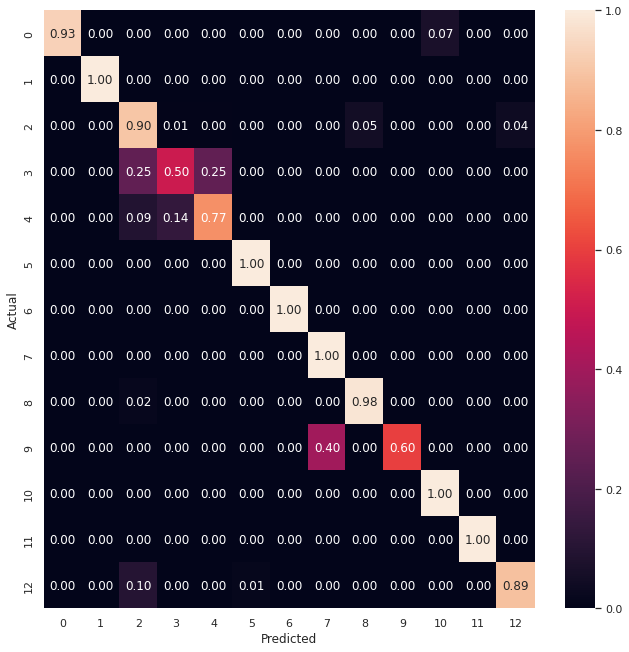

In [97]:
PlotConfusionMatrixProbability(c_matrix, d)

## QDA

In [98]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
y_pred = qda.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



In [99]:
c_matrix = confusion_matrix(y_test, y_pred)

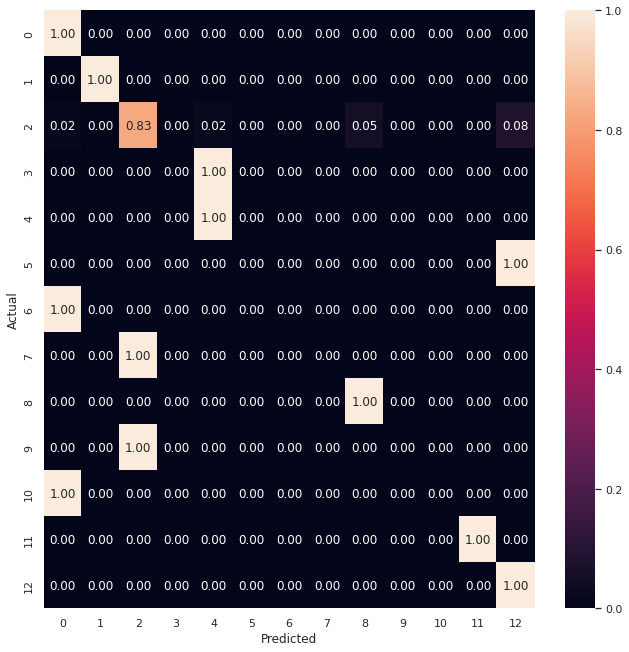

In [100]:
PlotConfusionMatrixProbability(c_matrix, d)

# Regressão logística

## One Versus One Classification

In [101]:
model = LogisticRegression()

In [102]:
ovo = OneVsRestClassifier(model)
ovo.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

OneVsRestClassifier(estimator=LogisticRegression())

In [103]:
yhat = ovo.predict(X_test)
c_matrix = confusion_matrix(y_test, yhat)

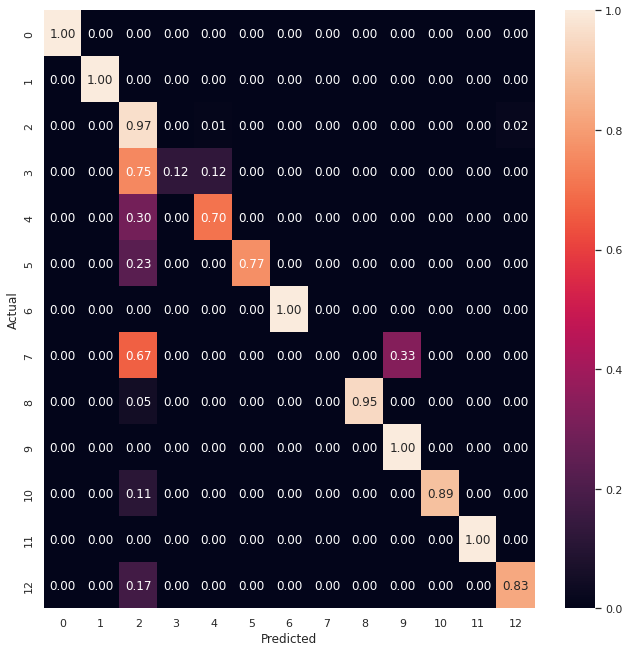

In [104]:
PlotConfusionMatrixProbability(c_matrix, d)# a gente colocou essas matrizes, com um dicionario para esses numeros

## One Versus Rest Classification

In [105]:
ovr = OneVsRestClassifier(model)

In [106]:
y_score = ovr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

In [107]:
y_pred = ovr.predict(X_test)
c_matrix = confusion_matrix(y_test, y_pred)

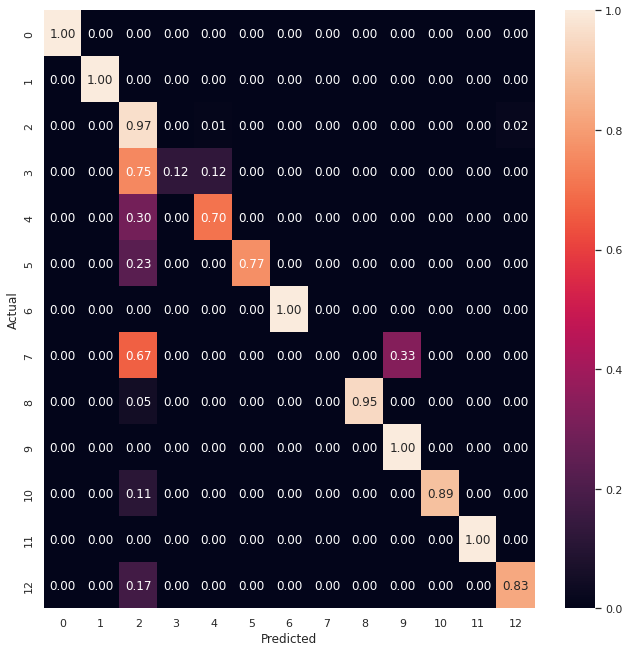

In [108]:
PlotConfusionMatrixProbability(c_matrix, d)

## Multinomial Logistic Regression

In [109]:
model = LogisticRegression(multi_class='multinomial', max_iter=25000).fit(X_train, y_train)

In [110]:
y_pred = model.predict(X_test)

In [111]:
c_matrix = confusion_matrix(y_test, y_pred)

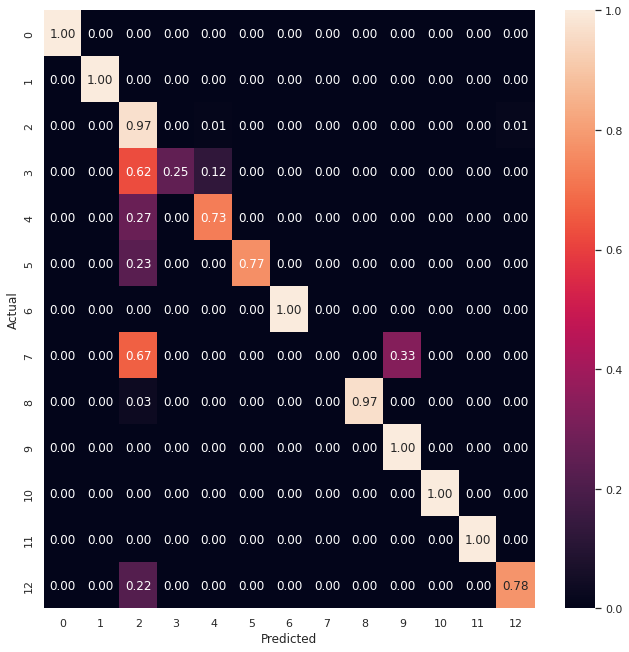

In [112]:
PlotConfusionMatrixProbability(c_matrix, d)


## KNN Classification

In [113]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 30)}
knn_gscv = GridSearchCV(neigh, param_grid, cv=5)

knn_gscv.fit(X_train, y_train)

yh = knn_gscv.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



In [114]:
knn_gscv.best_params_

{'n_neighbors': 6}

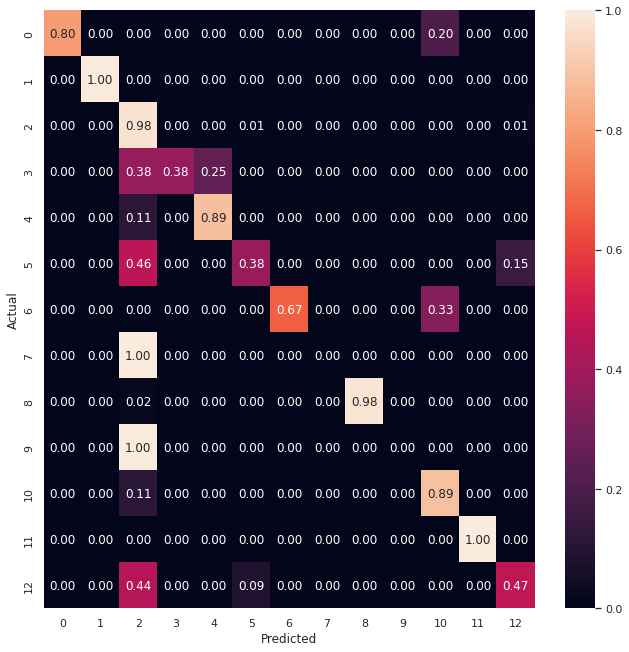

In [115]:
c_matrix = confusion_matrix(y_test, yh)
PlotConfusionMatrixProbability(c_matrix, d)

## SVM Classification

In [116]:
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear', gamma='auto', probability=True))
clf.fit(X_train, y_train)#será que se eu 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear', probability=True))])

In [117]:
yc = clf.predict(X_test)

In [118]:
c_matrix = confusion_matrix(y_test, yc)

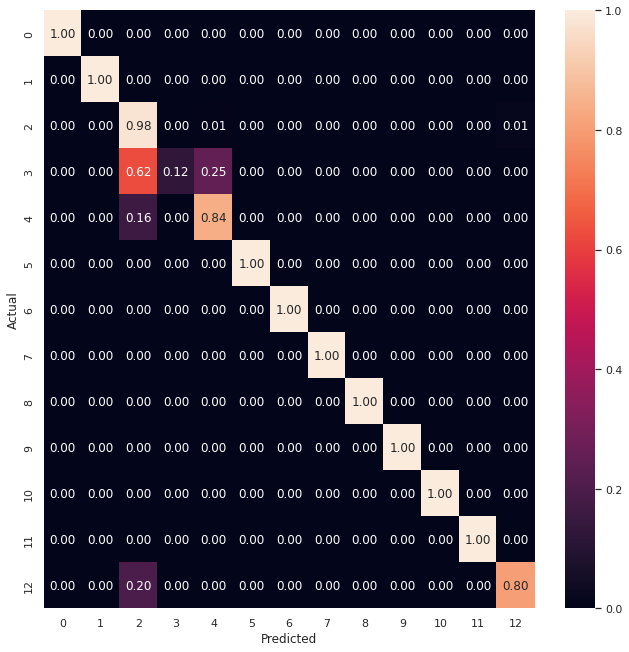

In [119]:
PlotConfusionMatrixProbability(c_matrix, d)#o svm com kernel linear ficou com 95%

In [120]:
models = [KNeighborsClassifier(n_neighbors=6), lda, qda, model, clf]#são as funções que chamam os modelos

In [121]:
models_string = ['lda', 'qda', 'logistic regression', 'svm', 'knn']#eu acho que não, tentei usar mais colunas com uma função e nem plota

In [122]:
def plotRocCurveForAllModels(models, param_grid,X_train, y_train, X_test):
  for i in range(len(models)):
    if i == 0:
      ovr = OneVsRestClassifier(models[i])
      y_score = ovr.fit(X_train, y_train).predict_proba(X_test)
    else:
      ovr = OneVsRestClassifier(models[i])
      y_score = ovr.fit(X_train, y_train).decision_function(X_test)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                      ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()



In [123]:
pip install mlxtend  


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [124]:
df_teste = pd.concat([teste.iloc[:,63], teste.iloc[:,4]], axis = 1)

In [125]:
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions
def plotRocCurveForAllClass(models, df_teste, y_accuracy):#tem muita coisa


      
      X_train, X_test, y_train, y_test = train_test_split(df_teste, y_accuracy, test_size=0.33, random_state = 42)#nao sei o que são, mas é que o programa vai pegar a ultima menos 1, 5-1  
      for i in range(len(models)):
        ovr = OneVsRestClassifier(models[i]).fit(X_train, y_train)
        value=0.1
        width=0.1  

        # Plot decision boundary
        plot_decision_regions(X_train.values, y_train.values, clf=ovr)# testei outras formas de plotar
        plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

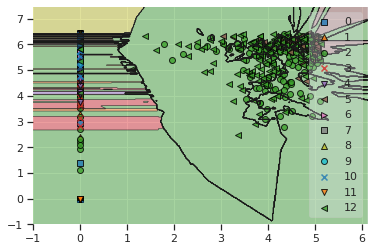

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearDiscriminantAn

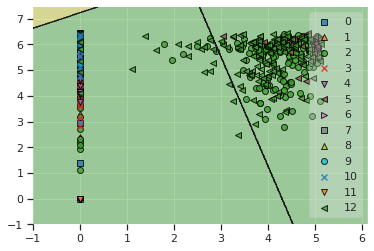

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:

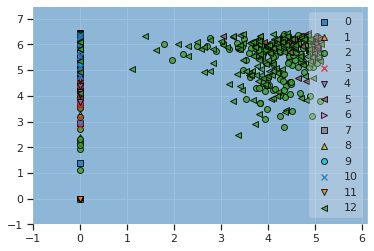

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/usr/local

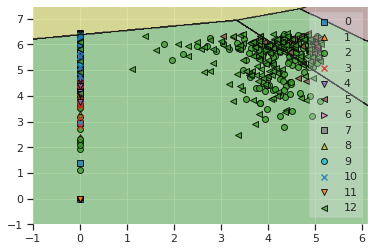

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-pack

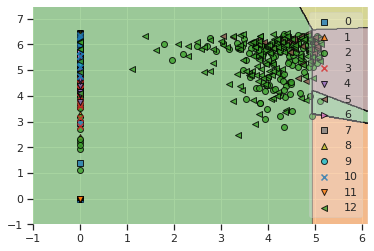

In [126]:

plotRocCurveForAllClass(models, df_teste, y_accuracy)
 #sim, são resultados novos, não tinha isso antes


In [127]:
df_teste

,hdl,bmi
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
3605,0.0,5.111988
3606,0.0,4.770685
3607,0.0,6.242223
3608,0.0,6.198479


In [128]:
y = label_binarize(y, classes=[0,1,2,8,12])#também nao
n_classes = 5

In [129]:
X_train, X_test, y_train, y_test = train_test_split(teste, y, test_size=0.33)

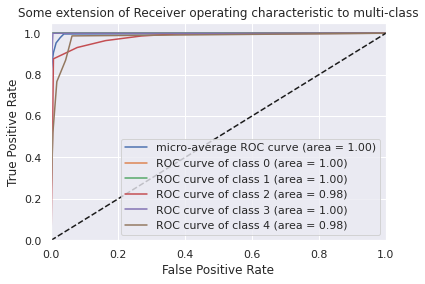

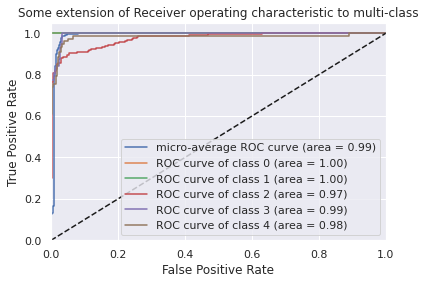

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



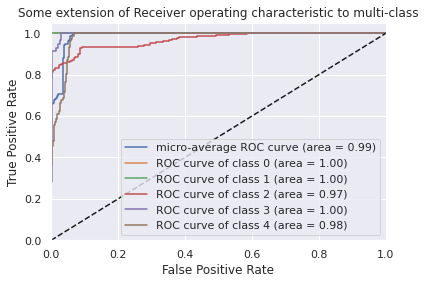

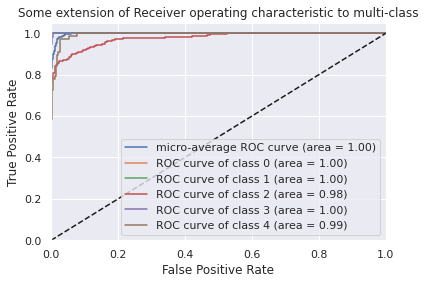

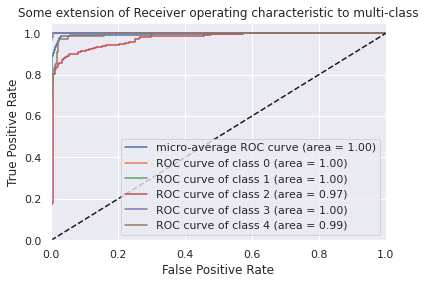

In [130]:
plotRocCurveForAllModels(models, param_grid, X_train, y_train, X_test)

In [131]:
def accuracyForAllModels(models, X_train, y_train, X_test, y_test):
    ls = []
    for i in range(len(models)):
     model_test = models[i].fit(X_train, y_train)
     y_pred = model_test.predict(X_test)
     ls.append(accuracy_score(y_test, y_pred))
    return ls

In [132]:
X_train, X_test, y_train, y_test = train_test_split(teste, y_accuracy, test_size=0.33, random_state = 42)

In [133]:
ls = accuracyForAllModels(models, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



In [134]:
ls

[0.9186440677966101,
 0.9016949152542373,
 0.8372881355932204,
 0.9415254237288135,
 0.9584745762711865]

In [135]:
principalComponents.shape

(3573, 2)

In [136]:
const = target.values.ravel()

In [137]:
const.shape

(3573,)

In [138]:
disw, disl = np.meshgrid(pca.components_[0], pca.components_[1])
cdf = pd.DataFrame({'eixo x': disw.reshape(-1),
                   'eixo y': disl.reshape(-1),
                   })

In [139]:
cdf = pd.concat([cdf, target], axis = 1)

In [140]:
cdf.dropna(inplace=True)

In [141]:
cdf

,eixo x,eixo y,disease
0,-0.132600,-0.007347,2.0
1,-0.029823,-0.007347,2.0
2,0.052534,-0.007347,2.0
3,-0.004538,-0.007347,2.0
4,-0.018438,-0.007347,2.0
...,...,...,...
3605,0.141348,0.001196,2.0
3606,-0.024967,0.001196,10.0
3607,-0.026398,0.001196,2.0
3608,-0.026215,0.001196,0.0


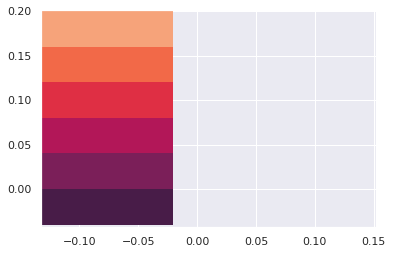

In [142]:
plt.contourf(disw, disl, disl)

In [143]:
cdf = cdf.drop(['disease'], axis = 1)

In [144]:
cdf

,eixo x,eixo y
0,-0.132600,-0.007347
1,-0.029823,-0.007347
2,0.052534,-0.007347
3,-0.004538,-0.007347
4,-0.018438,-0.007347
...,...,...
3605,0.141348,0.001196
3606,-0.024967,0.001196
3607,-0.026398,0.001196
3608,-0.026215,0.001196


In [145]:
X_train, X_test, y_train, y_test = train_test_split(teste.iloc[:,0:2], y_accuracy, test_size=0.4, random_state = 42)

In [146]:
h = 0.1

In [147]:
clf =  SVC(kernel = 'linear', gamma='auto', probability=True)
clf.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [148]:
     y_pred = clf.predict(X_test)
     accuracy_score(y_test, y_pred)
    

0.7524475524475525

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning:

divide by zero encountered in double_scalars



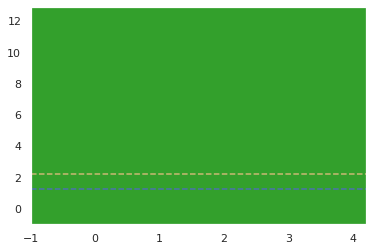

In [149]:
    h = 0.1  # step size in the mesh
    x_min, x_max = teste.iloc[:, 0].min() - 1, teste.iloc[:, 0].max() + 1
    y_min, y_max = -1, 13
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")

    # Plot also the training points
    colors = "bry"

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_#

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

        plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

In [150]:
clf.support_vectors_.shape

(798, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



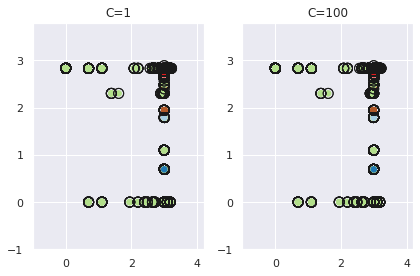

In [151]:
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    # obtain the support vectors through the decision function
    X = np.array(X_test)
    y = np.array(y_test).flatten()
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y_test, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))# aqui ele cria um dataset parecido com as colunas que eu passei do original
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)#sim ele ta prevendo as doenças e no plot ele tenta criar os limites
    plt.contourf(#é que tem a variancia dos dados, talvez não perca muita informação 
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

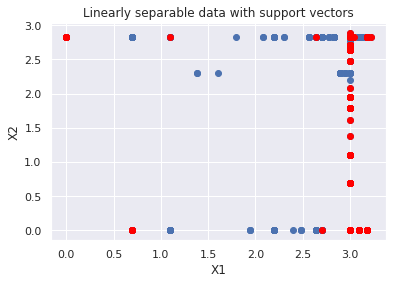

In [152]:
support_vectors = clf.support_vectors_# sim
#queria tentar com o R pq nada funciona 
# Visualize support vectors
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')# isso
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [153]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
    model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt

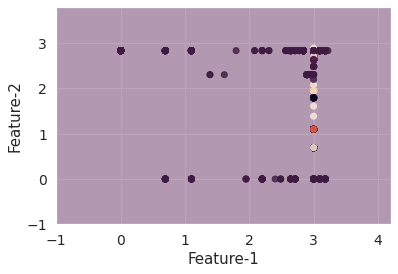

In [154]:
plot_decision_boundaries(X_train, y_train, SVC, kernel = 'linear', gamma='auto', probability=True)
plt.show()

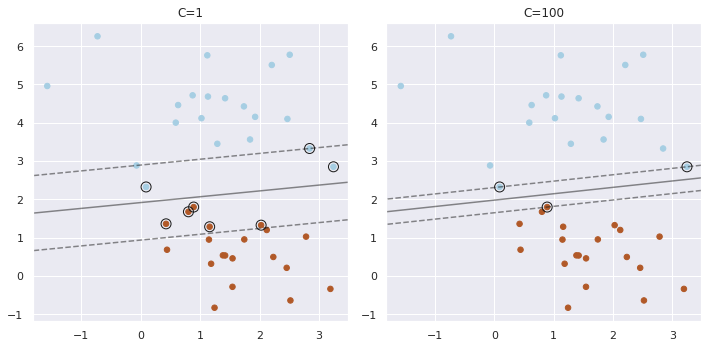

In [155]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import numpy as np
X, y = make_blobs(n_samples=40, centers=2, random_state=0)#um dataset menor, nao sei o que é isso, mas o código funcionou acho que é um dataset aleatorio
#nao faco ideia
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(
        xx,
        yy,
        Z,
        colors="k",
        levels=[-1, 0, 1],
        alpha=0.5,
        linestyles=["--", "-", "--"],
    )
    plt.scatter(
        support_vectors[:, 0],
        support_vectors[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.title("C=" + str(C))
plt.tight_layout()#o colab não ta pronto
plt.show()#é

In [156]:
X.shape

(40, 2)

In [157]:
np.cov(teste)

array([[0.38298087, 0.36902994, 0.31434383, ..., 0.33601888, 0.336386  ,
        0.33228823],
       [0.36902994, 0.35678403, 0.30648302, ..., 0.32055556, 0.32073404,
        0.3169544 ],
       [0.31434383, 0.30648302, 0.27450323, ..., 0.26325997, 0.26156259,
        0.25965655],
       ...,
       [0.33601888, 0.32055556, 0.26325997, ..., 0.81850871, 0.81494045,
        0.78846999],
       [0.336386  , 0.32073404, 0.26156259, ..., 0.81494045, 0.92312344,
        0.86661483],
       [0.33228823, 0.3169544 , 0.25965655, ..., 0.78846999, 0.86661483,
        0.82367717]])

In [158]:
ls_var = []
for i in teste.columns:
    ls_var.append(np.cov(teste[i]))

In [159]:
ls_var

[array(1.18364037),
 array(1.03221313),
 array(0.01188595),
 array(1.32448195),
 array(8.07887061),
 array(1.58704793),
 array(0.09907603),
 array(0.37388987),
 array(0.10650498),
 array(0.96528545),
 array(0.31663437),
 array(0.23796274),
 array(0.01451978),
 array(0.12852753),
 array(0.00141115),
 array(0.00772495),
 array(0.2081166),
 array(0.15544436),
 array(0.06702701),
 array(0.29644612),
 array(0.132259),
 array(0.17397976),
 array(0.1323296),
 array(0.01202354),
 array(0.01904022),
 array(0.26791893),
 array(0.12300464),
 array(0.01320124),
 array(0.01571741),
 array(0.04534273),
 array(0.00747781),
 array(0.14243824),
 array(0.11296626),
 array(0.01219748),
 array(0.01070549),
 array(0.01930264),
 array(0.91866726),
 array(0.00254357),
 array(1.61956201),
 array(0.50534659),
 array(0.12405426),
 array(0.0743238),
 array(0.02391418),
 array(0.03177385),
 array(0.07259319),
 array(0.0743238),
 array(0.0743238),
 array(0.0743238),
 array(0.01227154),
 array(0.014348),
 array(0.1

In [160]:
indices = sorted(range(len(ls_var)), key=lambda i: ls_var[i], reverse=True)
print(indices) # [1, 0, 2]

[4, 63, 55, 38, 5, 3, 0, 1, 9, 61, 36, 60, 59, 70, 53, 68, 39, 67, 7, 52, 10, 19, 25, 11, 78, 69, 16, 50, 79, 21, 17, 66, 31, 22, 20, 13, 40, 26, 56, 32, 62, 8, 6, 71, 41, 45, 46, 47, 44, 18, 51, 74, 65, 29, 75, 54, 43, 77, 42, 76, 35, 24, 73, 57, 28, 12, 49, 27, 48, 33, 23, 2, 58, 34, 15, 30, 64, 72, 37, 14]


In [161]:
teste.iloc[:,4]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
3605    5.111988
3606    4.770685
3607    6.242223
3608    6.198479
3609    5.857933
Name: bmi, Length: 3573, dtype: float32